# Stepwise, Lasso, and Ridge linear regression example

**Example of Stepwise, Lasso, and Ridge linear regression to optimize AIC, BIC, or VIF**

The stepAIC module includes three main functions, stepwise, lasso, and ridge, to find the set of predictor variables that optimizes either the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), adjusted rsquared, or Variance Inflation Factors (VIF) in a multiple linear regression model.

The choice between Lasso, Ridge, or Stepwise regression depends on the specific context and requirements of the analysis. Stepwise regression is widely used ([e.g. Murtaugh, 2009](https://doi.org/10.1111/j.1461-0248.2009.01361.x)), but often criticized ([e.g. Flom and Cassell, 2007](https://www.lexjansen.com/pnwsug/2008/DavidCassell-StoppingStepwise.pdf)). Lasso and Ridge regression are generally preferred for their efficiency and ability to handle large datasets without overfitting. However, Stepwise regression can be more suitable for exploratory data analysis and when the goal is to identify the most influential predictors. Ultimately, the best choice depends on the data characteristics and the researcher's objectives.

### Stepwise

The **stepwise** function in the stepAIC module has the option to use either forward selection (default), backward selection, or all subsets of possible combinations for the optimum set of predictor variables as follows:

- Forward selection (default) starts with no predictors and adds predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- Backward selection starts with all predictors and removes predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- All subsets of possible combinations of predictor features to find the best of all possible models (up to 20 candidate predictors)

Either the AIC, BIC, or adjusted rsquared may be used as the criterion with forward, backward, or all subsets. In addition, there is an option to find all features with p-values less than a signficance threshold through backward elimination based only on the p-values of the coefficients. The stepwise algorithm also has the option (default) to remove any non-signficant predictors after either a forward, backward, or all subsets search using the AIC, BIC, or adjusted rsquared criterion.

### Lasso

The **lasso** function in the stepAIC module provides output of regression models and summary statistics using the following methods:

- LassoCV: Lasso using Cross-Validation with coordinate descent to optimize alpha
- LassoLarsCV: Lasso using Cross-Validation with Least Angle Regression
- LassoLarsIC using AIC: Lasso using Least Angle Regression with Akaike Information Criterion
- LassoLarsIC using BIC: Lasso using Least Angle Regression with Bayesian Information Criterion

Lasso (Least Absolute Shrinkage and Selection Operator) adds a penalty to the loss function. This penalty encourages sparsity in the model, meaning that some coefficients will be exactly zero, effectively removing the corresponding predictors from the model.

Lasso linear regression includes a penalty term to the standard least squares objective function. The penalty term is a sum of the absolute values of the regression coefficients multiplied by a hyperparameter, denoted as "alpha". The lasso function finds the optimum value of alpha for each of the methods listed above. The alpha determines the amount of shrinkage applied to the model coefficients. As alpha increases, the coefficients are pushed towards zero, and some may become exactly zero, effectively eliminating those features from the model.

Lasso regression is useful for dealing with multicollinearity, where predictors are highly correlated, and when an optimal subset of the candidate features should be included in the model.

### Ridge

The **ridge** function in the stepAIC module provides output of regression models and summary statistics using the following methods:

- RidgeCV: RidgeCV regression with default cross-validation using the MSE as the scoring criterion to optimize alpha
- RidgeAIC: Ridge regression using AIC as the scoring criterion to optimize alpha by trial
- RidgeBIC: Ridge regression using BIC as the scoring criterion to optimize alpha by trial
- RidgeVIF: Ridge regression using target VIF to optimize alpha by trial

Ridge regression adds a penalty to the loss function, which is the product of the regularization hyperparameter and the sum of the squares of the coefficients. This penalty shrinks the coefficients towards zero but does not force them to be exactly zero.

Ridge regression is useful for dealing with multicollinearity, where predictors are highly correlated, and when all candidate features should be included in the model.

### Comparison of Stepwise, Lasso, and Ridge

- Feature selection: Lasso performs explicit feature selection by setting some coefficients to zero, while Ridge shrinks coefficients but retains all predictors. Stepwise regression also performs feature selection but can be less stable than Lasso. 
- Regularization: Both Lasso and Ridge are regularization techniques that prevent overfitting, but they do so differently. Lasso is more likely to produce sparse models, while Ridge is more likely to shrink coefficients smoothly. 
- Computational cost: Stepwise regression can be computationally expensive, especially for large datasets. Lasso and Ridge can be solved more efficiently using optimization algorithms. 

### AIC vs BIC

Using AIC as the criterion is the default in the **stepwise** fuction. The user also has the option to use the BIC as the criterion instead. AIC is considered to be a useful critierion in stepwise regression. However, BIC is generally considered to be better than AIC for several reasons:

- Penalty for Complexity: BIC penalizes models more heavily for the number of parameters, making it more conservative and less likely to overfit, especially with larger sample sizes.
- Model Selection: BIC is particularly useful when the sample size is large, as it encourages simpler models that are less likely to capture noise.
- Model Recovery: Studies suggest that BIC tends to recover the true model more effectively than AIC, particularly in scenarios where the sample size is large.
While both criteria are useful for model selection, BIC is often preferred for its stricter criteria, which helps in avoiding overfitting and improving model interpretability

### Limitations of Ridge regression for feature selection and the utility of AIC and BIC

Unlike Lasso regression, Ridge regression does not have zeroing of selected coefficients as a goal. Therefore, Ridge regression generally does not select a subset of features for the final best model. Instead, Ridge regression retains all of the candiate features in the input data set and has the goal of minimizing the coefficient values as a strategy to reduce the variance inflation factors to mitigate the effects of multicollinearity.

AIC and BIC have limited value in optimizing Ridge regression. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression. Using AIC and BIC have the effect of choosing the lowest value of alpha, which is similar to performing ordinary linear regression without regularaization and with no mitigation of multicollinearity.

If feature selection is the goal of the analysis, then Stepwise or Lasso regression methods are generally better than Ridge regression for that purpose. If your analysis requires that all candidate features are retained in the final model, then Ridge regression is ideal for that purpose using the **ridge** results for RidgCV.

### Acceptable VIF as the target for Ridge regression

Ridge regression reduces the Variance Inflation Factors of the features by adding a penalty term to the ordinary least squares regression. The magnitude of the penalty term is related to the regularization paramter (alpha) and the sum of the squared coefficients. At very low values of alpha there is negligible penalty and the Ridge regression results are practically the same as OLS. As the alpha value is increased, the penalty increases and the VIF values of the features decreases, which decreases the magnitude of the coefficients to mitigates the problem of multicollinearity.

Cross-validated ridge regression (e.g. using RidgeCV) does not always result in acceptable multicollinearity as indicated by VIF. While cross-validation helps in fine-tuning the regression coefficients, it does not always result in VIF values close to 1. Ideally the VIF of all features should be as close as possibe to VIF=1. This can be achieved using a trial and error method of evaluating the VIF values of the model features over a range of alpha values. 

The **ridge** function in stepAIC includes an algorithm (RidgeVIF) to find the model with the optimum value of alpha that will result in VIF values as close as possible to a user-specified target VIF (default target VIF=1.0). This assures that there will be acceptable multicollinearity for all features. The trade-off is that this algorithm reduces the model coefficients such that the target VIF will be achieved. The user has the option to specify any target for VIF to explore the balance between VIF and coefficient values.  

### Example data set

In this example we will use the concrete.csv dataset from HW1 and HW2 of UW CEE 415 Machine Learning

## Install and import the packages that are needed

In [3]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In [1]:
from stepAIC import stepwise, lasso, ridge
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load and clean the data set

In [5]:
# import the dataset
df = pd.read_csv("concrete.csv")
print(df.head())

   attr_1  attr_2  attr_3  attr_4  attr_5  attr_6  attr_7  attr_8  strength
0   141.3   212.0     0.0   203.5     0.0   971.8   748.5      28     29.89
1   168.9    42.2   124.3   158.3    10.8  1080.8   796.2      14     23.51
2   250.0     0.0    95.7   187.4     5.5   956.9   861.2      28     29.22
3   266.0   114.0     0.0   228.0     0.0   932.0   670.0      28     45.85
4   154.8   183.4     0.0   193.3     9.1  1047.4   696.7      28     18.29


In [6]:
# load the description file
headers = json.load(open('data_column_description.txt'))
headers

{'attr_1': 'cement',
 'attr_2': 'slag',
 'attr_3': 'fly_ash',
 'attr_4': 'water',
 'attr_5': 'superplasticizer',
 'attr_6': 'coarse_aggregate',
 'attr_7': 'fine_aggregate',
 'attr_8': 'age'}

In [7]:
# rename the columns
df.rename(columns = headers,
inplace = True)
print(df.head())
print("The columns have been renamed.")

   cement   slag  fly_ash  water  superplasticizer  coarse_aggregate  \
0   141.3  212.0      0.0  203.5               0.0             971.8   
1   168.9   42.2    124.3  158.3              10.8            1080.8   
2   250.0    0.0     95.7  187.4               5.5             956.9   
3   266.0  114.0      0.0  228.0               0.0             932.0   
4   154.8  183.4      0.0  193.3               9.1            1047.4   

   fine_aggregate  age  strength  
0           748.5   28     29.89  
1           796.2   14     23.51  
2           861.2   28     29.22  
3           670.0   28     45.85  
4           696.7   28     18.29  
The columns have been renamed.


In [8]:
# report the shape of the dataset
print("There are {0} rows and {1} columns in the dataset".format(df.shape[0],df.shape[1]))

There are 1030 rows and 9 columns in the dataset


In [9]:
# # check duplicated rows
print("There are {} duplicated rows in the dataset".format(df.duplicated().sum()))

There are 25 duplicated rows in the dataset


In [10]:
# drop duplicates and missing values and print the shape again
df.drop_duplicates(inplace=True)
print("There are {0} rows and {1} columns in the dataset after removing the duplicated rows"
      .format(df.shape[0],df.shape[1]))

There are 1005 rows and 9 columns in the dataset after removing the duplicated rows


In [11]:
# clean the data by dropping rows with nan
df = df.dropna()
print("There are {0} rows and {1} columns in the dataset after removing the rows with nan values"
      .format(df.shape[0],df.shape[1]))

# # optional - fill missing data with mean or median
# # df['column_name'].fillna(df['column_name'].mean(), inplace=True)
# for column in df.columns:
#     df[column].fillna(df[column].mean(), inplace=True)

There are 1005 rows and 9 columns in the dataset after removing the rows with nan values


## Check a description, histograms, and correlation matrix of the data set

In [12]:
# describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


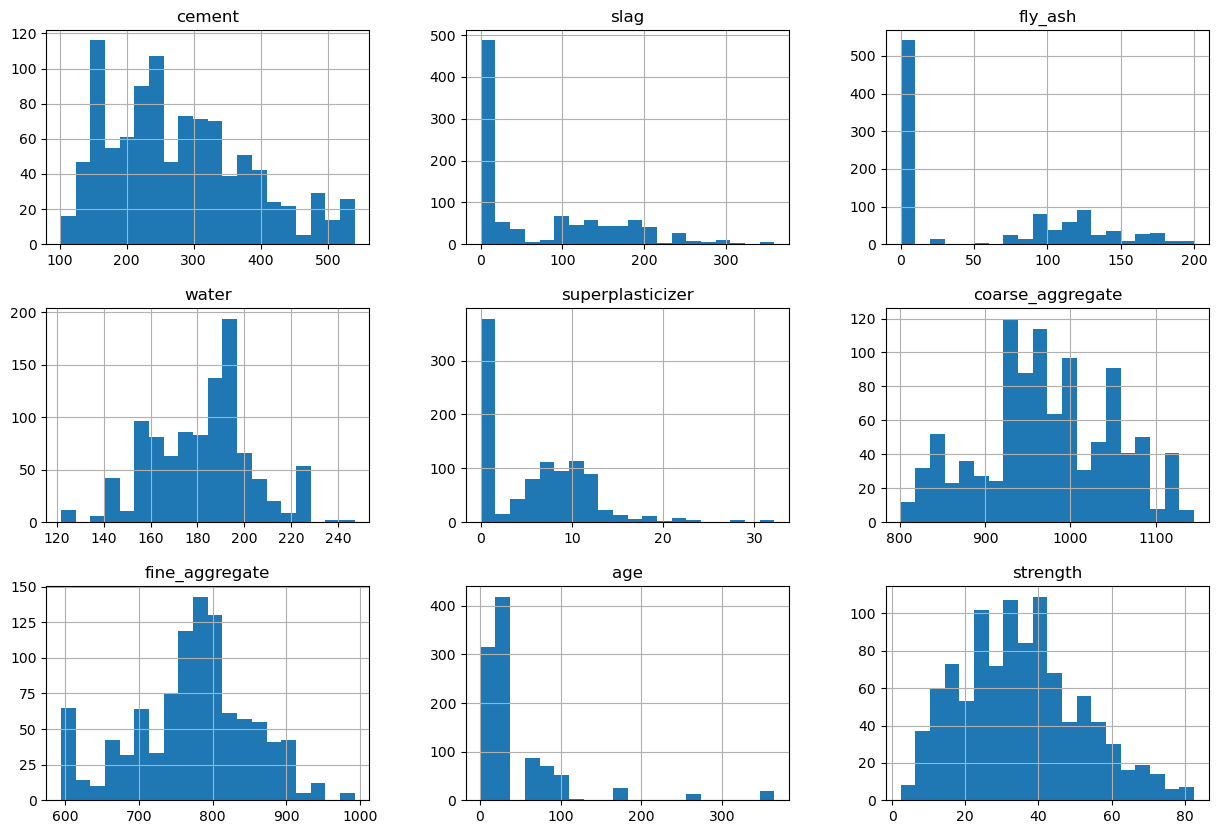

In [13]:
# show histrograms of the data
df.hist(bins=20, figsize=(15, 10));

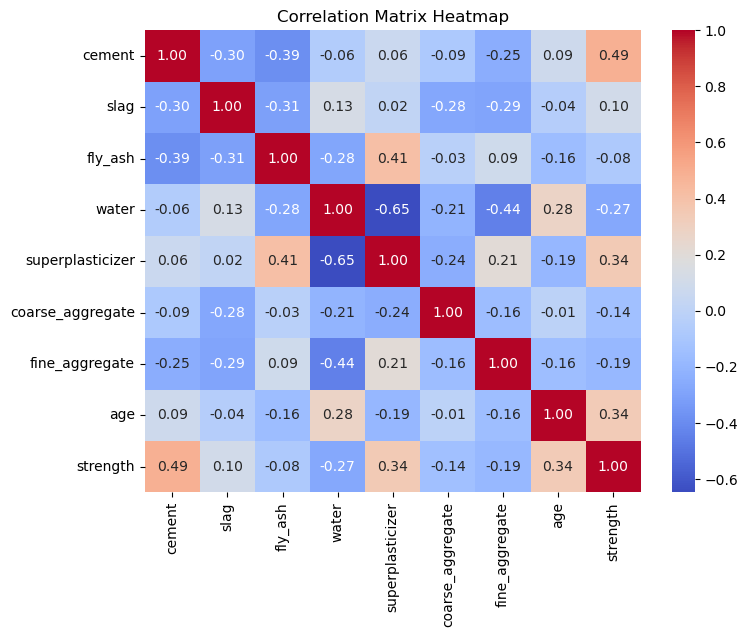

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
# Show which variables are potentially the most correlated predictors of strength
print('The following variables are potentially the most influential \n based on having absolute values of correlation coefficients >= 0.2:')
correlation_matrix['strength'][abs(correlation_matrix['strength'])>=.2]

The following variables are potentially the most influential 
 based on having absolute values of correlation coefficients >= 0.2:


cement              0.488283
water              -0.269624
superplasticizer    0.344209
age                 0.337367
strength            1.000000
Name: strength, dtype: float64

## Split the data set into the response variable (strength) and the candidate predictor variables

In [16]:
# Split the dataset into independent (X) and dependent (y) variables
X = df.drop(['strength'], axis = 1)
y = df['strength']

## Variance Inflation Factors of candidate predictors

In the next section we will use Variance Inflation Factors (VIF) to evaluate collinearity of all possible predictors. VIF values greater than 5 indicate excessive collinearity.

In [17]:
# Variance Inflation Factors of predictor variables
# VIF>5 indicates unacceptable collinearity
# Try dropping predictors that are most correlated with other predictors
# until all VIF values of the predictors are < 2

# import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant for the intercept
X_ = sm.add_constant(X)    

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_.columns
vif["VIF"] = [variance_inflation_factor(X_.values, i)
                    for i in range(len(X_.columns))]

print('VIF of independent variables included in the final model:')
print('VIF<5 indicates acceptable collinearity')
vif

VIF of independent variables included in the final model:
VIF<5 indicates acceptable collinearity


,Feature,VIF
0,const,6622.874767
1,cement,7.448990
2,slag,7.263275
3,fly_ash,6.084539
4,water,6.838492
5,superplasticizer,2.867335
6,coarse_aggregate,4.956211
7,fine_aggregate,6.972305
8,age,1.120113


#### Most of the predictors have VIF values greater than 5 if all of the candidate predictors are included in the model. This indicates that there is excessive collinearity if all of the candidate predictors are included in the final model. Therefore we will need to find a method to find an  optimum subset of predictor variables so that the VIF values of the final subset of selected predictors are less than 5

## Try forward stepwise using AIC as the criterion with 70% of the data for training

In the next section we will split the data into subsets for training and testing. The training data will be used to find the regression model. The testing data will be used to test whether the model fits a subset of data that the model was not trained on. We will use 70% of the data for training, and 30% for testing. 

The **stepwise** function finds the regression model with the minimum Akaike Information Criterion (AIC). The default forward stepping method starts with no predictors, and gradually adds predictors one at a time until the model with the minimum AIC is found.

We will also eliminate any predictors that are below a signficance threshold of p<0.05 (default setting in the stepwise function).

In [18]:
# Split the dataset into training and test subsets with test size of 30% and a random state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)
# report the shape
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (703,8)
y_train shape : (703,)
X_test shape : (302,8)
y_test shape : (302,)


Fitting Stepwise models, please wait ...


Model skill and features at each step in model_outputs['step_features']:

|   Step |     AIC |     BIC |   rsq_adj | Features                                                     |
|-------:|--------:|--------:|----------:|:-------------------------------------------------------------|
|      0 | 5953.18 | 5957.74 |  0        | []                                                           |
|      1 | 5730.23 | 5739.34 |  0.272803 | ['cement']                                                   |
|      2 | 5630.2  | 5643.87 |  0.370146 | ['cement' 'superplasticizer']                                |
|      3 | 5481.18 | 5499.4  |  0.491179 | ['cement' 'superplasticizer' 'age']                          |
|      4 | 5388.74 | 5411.52 |  0.554504 | ['cement' 'superplasticizer' 'age' 'slag']                   |
|      5 | 5333.91 | 5361.24 |  0.588511 | ['cement' 'superplasticizer' 'age' 'slag' 'water']           |
|      6 | 5288.39 | 5320.27 |  0.6

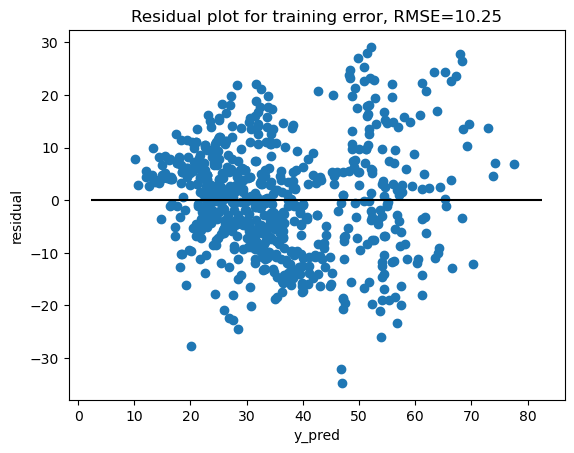

In [19]:
# find the best model that minimizes the criterion
model_object, model_output = stepwise(X_train, y_train)

#### Note that forward selection using AIC as the criterion did not eliminate any predictors. The previous VIF analysis shows that there is excessive collinearity, therefore we will explore other methods to see if we can find a simpler optimum model

## Try forward stepwise using BIC as the criterion with the training data

In the next section we will use BIC as the criterion with forward stepping, with the same data used previously for training, to see if we get similar results compared with the previous analysis using forward stepping with AIC as the criterion. 

BIC is generally considered better than AIC for stepwise regression for several reasons:

- Penalty for Complexity: BIC penalizes models more heavily for the number of parameters, making it more conservative and less likely to overfit, especially with larger sample sizes.
- Model Selection: BIC is particularly useful when the sample size is large, as it encourages simpler models that are less likely to capture noise.
- Model Recovery: Studies suggest that BIC tends to recover the true model more effectively than AIC, particularly in scenarios where the sample size is significant.
While both criteria are useful for model selection, BIC is often preferred for its stricter criteria, which helps in avoiding overfitting and improving model interpretability

We will also eliminate any predictors that are below a signficance threshold of p<0.05.

In the following example we will use the option of verbose='off' so that only the final results are displayed.

Fitting Stepwise models, please wait ...


Model skill and features at each step in model_outputs['step_features']:

|   Step |     AIC |     BIC |   rsq_adj | Features                                                     |
|-------:|--------:|--------:|----------:|:-------------------------------------------------------------|
|      0 | 5953.18 | 5957.74 |  0        | []                                                           |
|      1 | 5730.23 | 5739.34 |  0.272803 | ['cement']                                                   |
|      2 | 5630.2  | 5643.87 |  0.370146 | ['cement' 'superplasticizer']                                |
|      3 | 5481.18 | 5499.4  |  0.491179 | ['cement' 'superplasticizer' 'age']                          |
|      4 | 5388.74 | 5411.52 |  0.554504 | ['cement' 'superplasticizer' 'age' 'slag']                   |
|      5 | 5333.91 | 5361.24 |  0.588511 | ['cement' 'superplasticizer' 'age' 'slag' 'water']           |
|      6 | 5288.39 | 5320.27 |  0.6

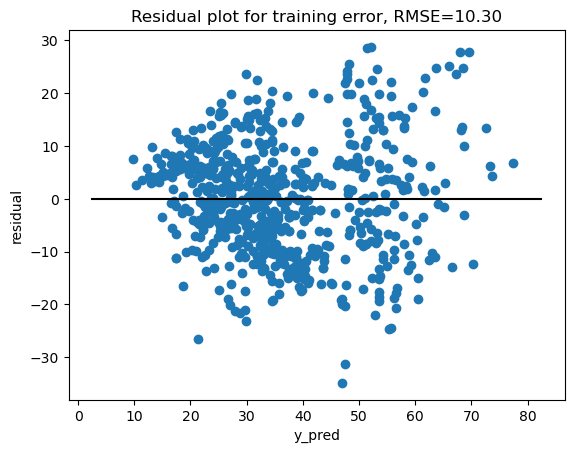

In [20]:
# find the best model that minimizes the criterion
model_object, model_output = stepwise(X_train, y_train, criterion='BIC')

#### Note that the forward stepBIC method results in a simpler model with fewer predictor variables and similar skill compared with the forward stepAIC method

## Check using BIC with backward stepwise

In the next section we will use backward stepping with BIC as the criterion, with the same data used previously for training, to see if we get similar results compared with the previous analysis using forward stepping with BIC as the criterion. 

The backward stepping option starts with all possible predictors, and gradually eliminates predictors one at a time until the model with the minimum BIC is found. 

We will also eliminate any predictors that are below a signficance threshold of p<0.05.

Fitting Stepwise models, please wait ...


Model skill and features at each step in model_outputs['step_features']:

|   Step |     AIC |     BIC |   rsq_adj | Features                                                                 |
|-------:|--------:|--------:|----------:|:-------------------------------------------------------------------------|
|      0 | 5285.78 | 5326.77 |  0.617361 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'coarse_aggregate' |
|        |         |         |           |  'fine_aggregate' 'age']                                                 |
|      1 | 5288.21 | 5324.65 |  0.615494 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'fine_aggregate'   |
|        |         |         |           |  'age']                                                                  |
|      2 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'age']             |
|      3 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'sla

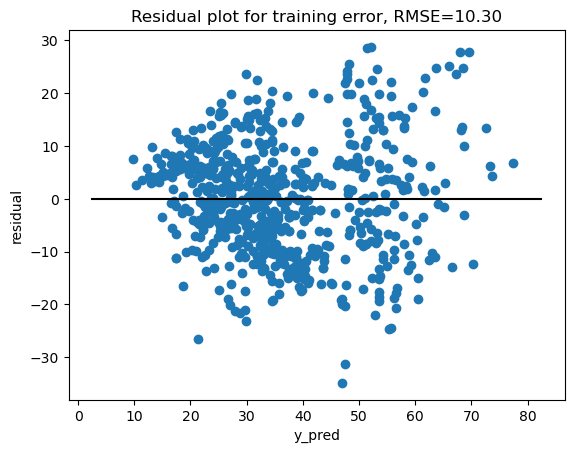

In [21]:
# find the best model that minimizes the criterion
model_object, model_output = stepwise(X_train, y_train, criterion='BIC', direction='backward')

#### Note that backward selection finds the same optimum model as the previous analysis using forward selection with BIC as the criterion. 

## Check using BIC with all possible combinations of predictors

In the next section we will BIC as the criterion and analyze all possible combinations of predictors. This assures that the best possible model will be found. We will use the same data that we used previously for training, to see if we get similar results compared with the previous analysis using forward and backward stepping with BIC as the criterion. 

We will also eliminate any predictors that are below a signficance threshold of p<0.05.

Fitting models for all 256 subsets of features, this may take up to a minute, please wait ...


Best 10 subsets of features in model_outputs['step_features']:

|   Rank |     AIC |     BIC |   rsq_adj | Features                                                                 |
|-------:|--------:|--------:|----------:|:-------------------------------------------------------------------------|
|      0 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'age']             |
|      1 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'age']             |
|      2 | 5293.85 | 5321.18 |  0.611305 | ['cement' 'slag' 'fly_ash' 'water' 'age']                                |
|      3 | 5291.8  | 5323.69 |  0.61298  | ['cement' 'slag' 'fly_ash' 'water' 'fine_aggregate' 'age']               |
|      4 | 5288.21 | 5324.65 |  0.615494 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'fine_aggregate'   |
|        |    

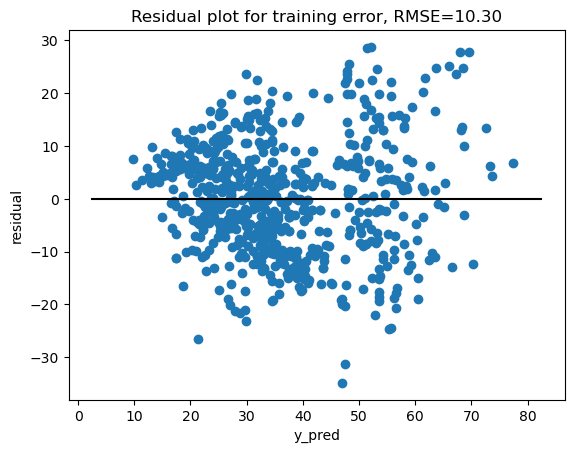

In [22]:
# find the best model that minimizes the criterion
model_object, model_output = stepwise(X_train, y_train, criterion='BIC', direction='all')

#### Note that the analysis of all possible combinations of predictors with BIC as the criterion finds the same optimum model as the previous analyses using forward and backward selection with BIC as the criterion. Therefore we will select the model results using BIC as the criterion as the final selected model since it is simpler than the model using AIC as the predictor, and it also has similar adjusted r^2, AIC, and BIC values with fewer parameters.

## Check the VIF of the final selected predictors

The standard output from the **stepwise** function displays the VIF values. Below we will show how the VIF values are calcualated and used to check whether there is excessive collinearity of the final selected predictors.

In [23]:
# Variance Inflation Factors of final selected predictor variables
# VIF>5 indicates unacceptable collinearity
# Try dropping predictors that are most correlated with other predictors
# until all VIF values of the predictors are < 5

# import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = model_output['selected_features']
X_ = X_train[selected_features]

# Add a constant for the intercept term
X_ = sm.add_constant(X_)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_.columns

vif["VIF"] = [variance_inflation_factor(X_.values, i)
                    for i in range(len(X_.columns))]

print('VIF of independent variables included in the final model:')
print('VIF<5 indicates acceptable collinearity')
vif

VIF of independent variables included in the final model:
VIF<5 indicates acceptable collinearity


,Feature,VIF
0,const,163.514849
1,cement,1.865569
2,slag,1.767366
3,fly_ash,2.354834
4,water,1.851291
5,superplasticizer,2.265633
6,age,1.141619


#### Note that all VIF values of the final selected predictors from stepBIC are well below 5, which indicates acceptable collinearity

## Plot the residuals 

The standard output from stepAIC includes plots of residuals. Below we will show how the residual plots are made

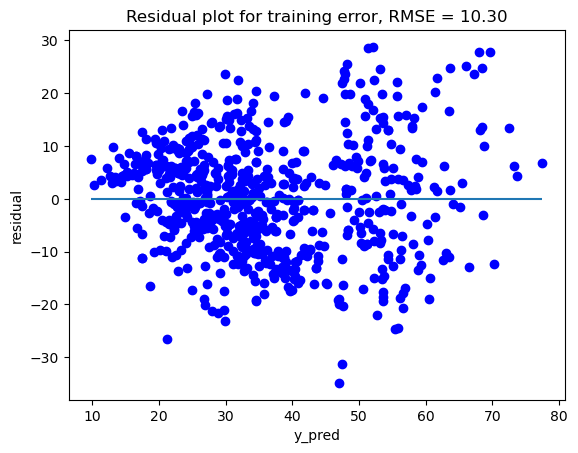

In [24]:
# residual plot for training error
y_pred_train = model_object.predict(sm.add_constant(X_train[selected_features]))
res_plot = plt.scatter(y_pred_train, (y_pred_train - y_train), c='b')
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train))
plt.title("Residual plot for training error, RMSE = {:.2f}".format(rmse_train))
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.show()

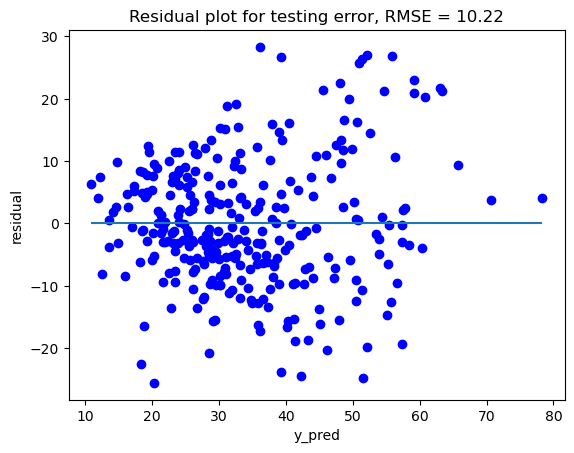

In [25]:
# residual plot for testing error
y_pred_test = model_object.predict(sm.add_constant(X_test[selected_features]))
res_plot = plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
plt.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test))
plt.title("Residual plot for testing error, RMSE = {:.2f}".format(rmse_test))
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.show()

#### Note that the RMSE for the testing data is practically the same as the RMSE of the training data. Therefore the model appears to be robust

# Standardization of predictor variables

The stepAIC functions inlcude the option to standardize the X data using the optional argument standardize='on'. Below we will show how the standardization is performed.

In the next sections we will repeat the regression analysis using standardization of the predictor variables.

Multiple linear regression analysis performs best when all numerical features are centered around 0 and have variance of the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This means it is sometimes important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation. This so called standard score $z$ for an observation $x$ is calculated as:

$$z = \frac{(x- \bar x)}{s}$$

where:

- x is an observation in a feature
- $\bar x$ is the mean of that feature
-  s is the standard deviation of that feature.

To avoid [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)), the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don't standardize our dummy variables, if any (which only have values of 0 or 1).

In [26]:
# scale X_train and X_test

from sklearn.preprocessing import StandardScaler

# note that the scaler for the train and test subsets is based on the train subset
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# convert scaled arrays into pandas dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Copy index from unscaled to scaled dataframes
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

In [28]:
# show the summary stats of the X_train_scaled
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,703.0,-2.097263e-16,1.000712,-1.681921,-0.849741,-0.136309,0.650634,2.445994
slag,703.0,-8.085835e-17,1.000712,-0.863253,-0.863253,-0.585320,0.809556,3.298793
fly_ash,703.0,1.516094e-17,1.000712,-0.856764,-0.856764,-0.856764,0.967721,2.227741
water,703.0,5.559011e-16,1.000712,-2.840738,-0.676228,0.156277,0.493968,3.031347
superplasticizer,703.0,1.010729e-17,1.000712,-1.045959,-1.045959,0.063311,0.660610,4.449193
coarse_aggregate,703.0,6.721350e-16,1.000712,-2.258924,-0.544031,-0.072763,0.717921,2.104235
fine_aggregate,703.0,4.548282e-16,1.000712,-2.176558,-0.645594,0.099199,0.618298,2.821331
age,703.0,-7.075105e-17,1.000712,-0.710516,-0.512365,-0.298972,0.127815,4.837709


## Stepwise regression using BIC with standardized X

Fitting models for all 256 subsets of features, this may take up to a minute, please wait ...


Best 10 subsets of features in model_outputs['step_features']:

|   Rank |     AIC |     BIC |   rsq_adj | Features                                                                 |
|-------:|--------:|--------:|----------:|:-------------------------------------------------------------------------|
|      0 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'age']             |
|      1 | 5288.39 | 5320.27 |  0.614856 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'age']             |
|      2 | 5293.85 | 5321.18 |  0.611305 | ['cement' 'slag' 'fly_ash' 'water' 'age']                                |
|      3 | 5291.8  | 5323.69 |  0.61298  | ['cement' 'slag' 'fly_ash' 'water' 'fine_aggregate' 'age']               |
|      4 | 5288.21 | 5324.65 |  0.615494 | ['cement' 'slag' 'fly_ash' 'water' 'superplasticizer' 'fine_aggregate'   |
|        |    

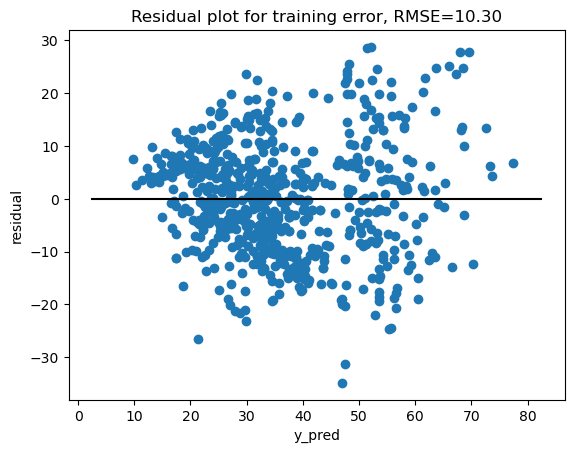

In [29]:
# find the best model that minimizes the criterion
model_object, model_output = stepwise(X_train_scaled, y_train, criterion='BIC', direction='all')

#### Note  that the same predictors are found in the best model using standardization compared with the previous results without standardization. The condition number with standardization is greatly reduced compared with the previous results without standardization, indicating that potential numerical problems related to different scales of the predicted variables has been corrected. Also the coefficient values for all of the predictors are similar order of magnitude with standardization. Otherwise, the results with standardaziation are practically the same as the results without standardization.

## Check the VIF of the results with standardization

In [30]:
# Variance Inflation Factors of final selected predictor variables
# VIF>5 indicates unacceptable collinearity
# Try dropping predictors that are most correlated with other predictors
# until all VIF values of the predictors are < 5

# import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

best_model = model_object
best_features = model_output['selected_features']
X_ = X[best_features]

# Add a constant for the intercept term
X_ = sm.add_constant(X_)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_.columns

vif["VIF"] = [variance_inflation_factor(X_.values, i)
                    for i in range(len(X_.columns))]

print('VIF of independent variables included in the final model:')
print('VIF<5 indicates acceptable collinearity')
vif

VIF of independent variables included in the final model:
VIF<5 indicates acceptable collinearity


,Feature,VIF
0,const,164.955992
1,cement,1.841536
2,slag,1.743282
3,fly_ash,2.312505
4,water,1.893423
5,superplasticizer,2.365308
6,age,1.108994


#### Note that the VIF values are the same with standardization compared with the previous results without standardization

## Check the residuals of the best standardized stepwise model

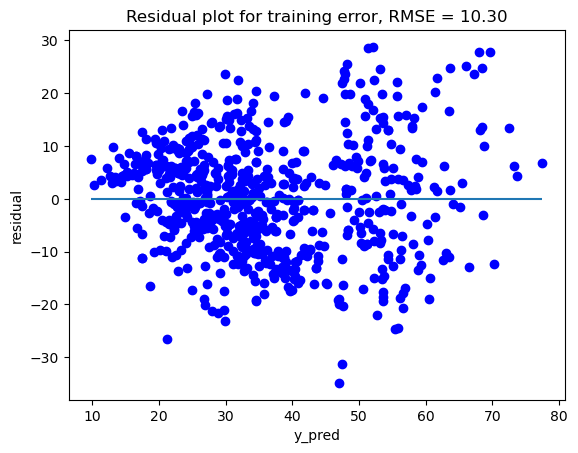

In [31]:
# residual plot for training error
y_pred_train = best_model.predict(sm.add_constant(X_train_scaled[best_features]))
res_plot = plt.scatter(y_pred_train, (y_pred_train - y_train), c='b')
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train))
plt.title("Residual plot for training error, RMSE = {:.2f}".format(rmse_train))
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.show()

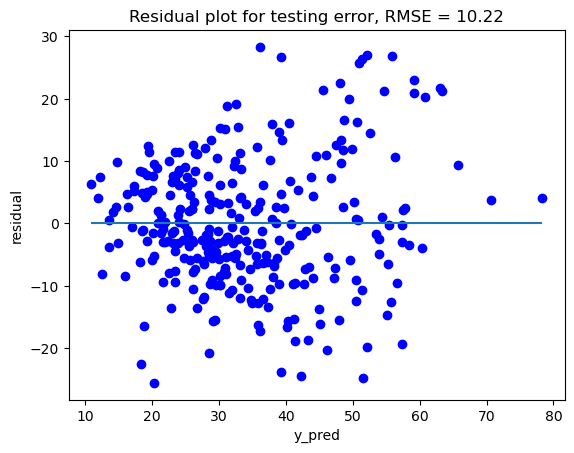

In [32]:
# residual plot for testing error
y_pred_test = best_model.predict(sm.add_constant(X_test_scaled[best_features]))
res_plot = plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
plt.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test))
plt.title("Residual plot for testing error, RMSE = {:.2f}".format(rmse_test))
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.show()

#### Note that the residual plots and RMSE values are the same using the standardized best model compared with the previous results without standardizing the predictors

# Lasso linear regression

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is a regression analysis method that performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the resulting statistical model. It is particularly useful when dealing with high-dimensional datasets where multicollinearity is present.

Lasso regression uses a hyper-parameter called "alpha" to fit the optimum set of predictor variables.

REQUIRED INPUTS 
- X = pandas dataframe of the candidate independent variables 
        (as many columns of data as needed)
- y = dependent variable (one column of data)

NOTE: Do any necessary/optional cleaning of the data before 
    passing the data to this function. X and y should have the same number of rows
    and contain only real numbers with no missing values. X can contain as many
    columns as needed, but y should only be one column. X should have unique
    column names for for each column



OPTIONAL KEYWORD ARGUMENTS

**kwargs (optional keyword arguments):
- nfolds= number of folds to use for cross-validation (CV) with LassoCV or LassoLarsCV (default nfolds=20)
- standardize= 'on' (default) or 'off' where
  - 'on': standardize X using sklearn.preprocessing StandardScaler
  - 'off': do not standardize X
- verbose= 'on' (default) or 'off' where
  - 'on': display model summary on screen 
  - 'off': turn off display of model summary on screen

It is generally recommended to use a largest possible number of folds for LassoCV and LassoLarsCV to ensure more accurate model selection. The only disadvantage of a large number of folds is the increase computational time. The lasso function allows you to specify the number of folds using the nfolds argument. Using a larger number can lead to better performance. For optimal results, consider experimenting with different fold sizes to find the best balance between performance and speed.

RETURNS

The following outputs are returned by the **lasso** function:

**model_objects** are the output objects from 
                sklearn.linear_model LassoCV, LassoLarsCV, and LassoLarsIC
                of the final best models using the following four methods: 
- LassoCV: k-fold CV coordinate descent
- LassoLarsCV: k-fold CV least angle regression
- LassoLarsAIC: LassoLarsIC using AIC
- LassoLarsBIC: LasspLarsIC using BIC

**model_outputs** is a dictionary of the following outputs:
                from the four Lasso linear regression model methods:
- 'scaler': sklearn.preprocessing StandardScaler for X
- 'standardize': 'on' scaler was used for X, 'off' scaler not used
- 'alpha_vs_coef': model coefficients for each X variable
                    as a function of alpha using Lasso
- 'alpha_vs_AIC_BIC': AIC and BIC as a function of alpha 
                    using LassoLarsIC
- 'stats': Regression statistics for each model
- 'popt': Constant (intercept) and coefficients for the 
                    best fit models from each of the four methods
- 'y_pred': Predicted y values for each of the four methods
- 'residuals': Residuals (y-y_pred) for each of the four methods


In the next line, we will run the **lasso** function to find the best models using each of the four Lasso methods. 

Fitting Lasso regression models, please wait ...


Lasso regression statistics of best models in model_outputs['stats']:


| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     0.00872469  |     0           |     0           |     0.156637    |
| r-squared          |     0.621693    |     0.621722    |     0.621722    |     0.616996    |
| adjusted r-squared |     0.61678     |     0.616809    |     0.616809    |     0.613138    |
| nobs               |   703           |   703           |   703           |   703           |
| df residuals       |   694           |   694           |   694           |   696           |
| df model           |     8           |     8           |     8           |     6           |
| F-statistic        |   142.561       |   142.579       |   142.579       |   186.869       |
| Prob (F-statistic) |

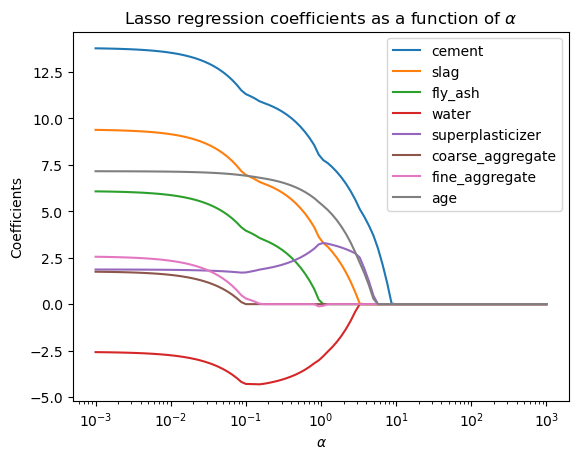

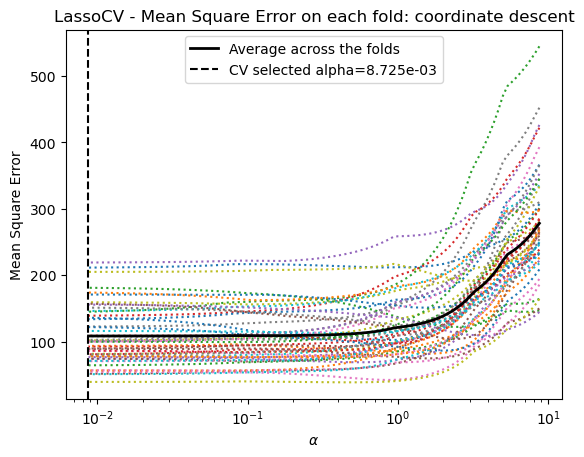

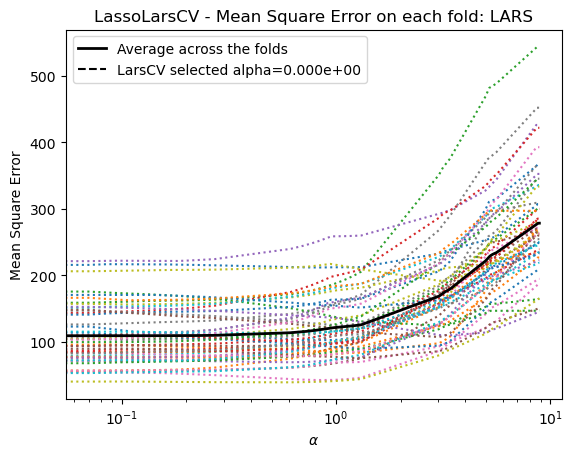

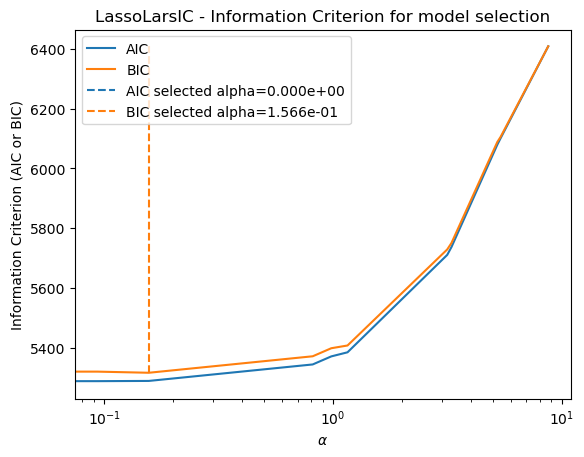

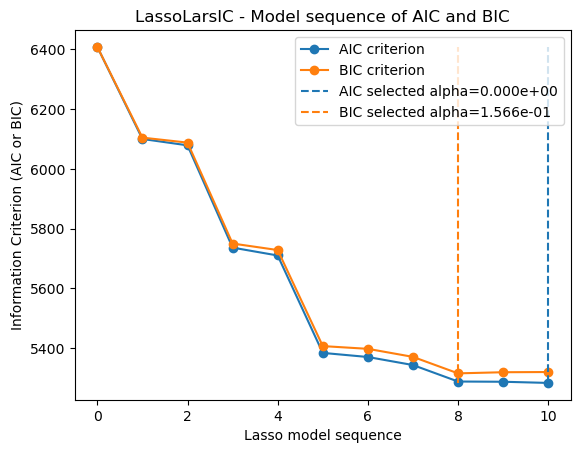

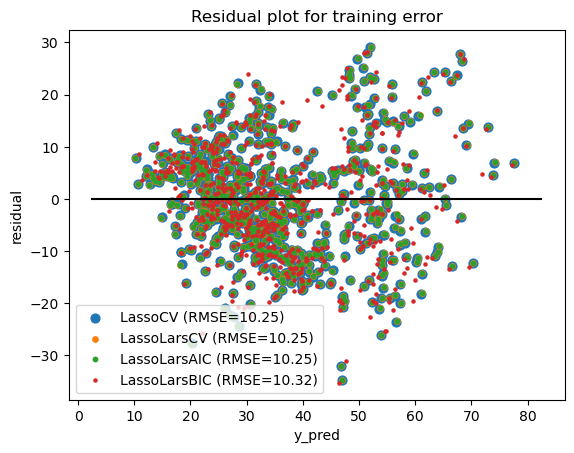

In [33]:
model_objects, model_outputs = lasso(X_train, y_train, nfolds=50)

#### Note that the LassoCV, LassoLarsCV, and LassoLarsAIC models did not eliminate any of the candidate predictors, therefore these methods result in excessive collinearity of features as shown above in the stepwise analysis using AIC. The LassoLarsBIC model finds the same best features as the previous stepwise method using BIC, therefore this model has acceptable collinearity as shown above in the stepwise section. The model skill from Lasso regression is similar to the skill of the models from stepwise regression.

## Check the residuals of the best Lasso model using the test data subset

The best result from trained Lasso regession is the model using LassoLarsIC with BIC as the criterion (LassoLarsBIC). In the next sections we will show how to look at the residuals of test data subset using the LassoLarsBIC model that was trained with the training data subset.

First, we will extract the scalar that was used to standardize the X values of training data subset from the output of the trained model, and use it to standardize the X values of the test data subset. 

In [34]:
# Extract the scaler that was used to standardize the X_train values
scaler = model_outputs['scaler']

# Normalize X_test using the same scaler that was used on X_train
X_test_scaled = scaler.transform(X_test)

# Convert scaled array into pandas dataframe with same column names as X
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Copy index from unscaled to scaled dataframes
X_test_scaled.index = X_test.index

Next we will extract the fitted model object for the best fit model using LassoLarsIC with BIC and use it to estimate predicted y values from  the test data.

In [35]:
# extract the trained model object of the best fit using LassoLarsIC with BIC
model = model_objects['LassoLarsBIC']

# use the trained LassoLarsBIC model to predict y_pred for the normalized test data subset
y_pred_test = model.predict(X_test_scaled) 

Finally we will plot the residuals for the predicted y values using the test data subset

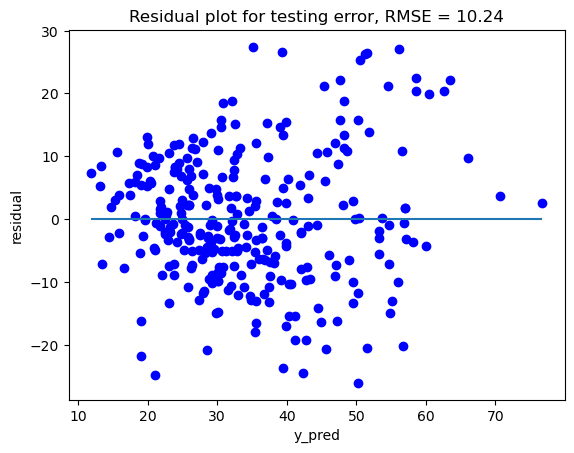

In [36]:
# residual plot for training error
res_plot = plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
plt.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test))
plt.title("Residual plot for testing error, RMSE = {:.2f}".format(rmse_test))
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.show()

# Ridge linear regression

The **ridge** function in the stepAIC package provides output of regression models and summary statistics using the following methods using the sklearn.linear_model package:

- RidgeCV: Ridge regression with default cross-validation using the MSE as the scoring criterion to select alpha
- RidgeAIC: Ridge regression using AIC as the scoring criterion to select alpha by trial
- RidgeBIC: Ridge regression using BIC as the scoring criterion to select alpha by trial
- RidgeVIF: Ridge regression using target VIF to select alpha by trial

#### Limitations of Ridge regression for feature selection and the utility of AIC and BIC

Unlike Lasso regression, Ridge regression does not have zeroing of selected coefficients as a goal. Therefore, Ridge regression generally does not select a subset of features for the final best model. Instead, Ridge regression retains all of the candiate features in the input data set and has the goal of minimizing the coefficient values as a strategy to reduce the variance inflation factors to mitigate the effects of multicollinearity.

AIC and BIC have limited value in optimizing Ridge regression. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression. Using AIC and BIC have the effect of choosing the lowest value of alpha, which is similar to performing ordinary linear regression without regularaization and with no mitigation of multicollinearity.

If feature selection is the goal of the analysis, then Stepwise or Lasso regression methods are generally better than Ridge regression for that purpose. If your analysis requires that all candidate features are retained in the final model, then Ridge regression is ideal for that purpose.

#### Acceptable VIF as the target for Ridge regression

Ridge regression reduces the Variance Inflation Factors of the features by adding a penalty term to the ordinary least squares regression. The magnitude of the penalty term is related to the regularization paramter (alpha) and the sum of the squared coefficients. At very low values of alpha there is negligible penalty and the Ridge regression results are practically the same as OLS. As the alpha value is increased, the penalty increases and the VIF values of the features decreases, which decreases the magnitude of the coefficients to mitigates the problem of multicollinearity.

Cross-validated ridge regression (e.g. using RidgeCV) does not always result in acceptable multicollinearity as indicated by VIF. While cross-validation helps in fine-tuning the regression coefficients, it does not always result in VIF values close to 1. Ideally the VIF of all features should be as close as possibe to VIF=1. This can be achieved using a trial and error method of evaluating the VIF values of the model features over a range of alpha values. 

The **ridge** function in stepAIC includes an algorithm (RidgeVIF) to find the model with the optimum value of alpha that will result in VIF values as close as possible to a user-specified target VIF (default target VIF=1.0). This assures that there will be acceptable multicollinearity for all features. The trade-off is that this algorithm reduces the model coefficients such that the target VIF will be achieved. The user has the option to specify any target for VIF to explore the balance between VIF and coefficient values. 

#### Example using the cement data set

In the following example using the cement data set we use vif_target=2 to find a model using RidgeVIF that has acceptable multicollinearity (VIF<5 for all features) and similar skill compared with the previous stepwise and lasso regression models


Fitting Ridge regression models, please wait ...


Ridge regression statistics of best models in model_outputs['stats']:


| Statistic          |         RidgeCV |        RidgeAIC |        RidgeBIC |        RidgeVIF |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     0.986266    |     1e-06       |     1e-06       |    17.0307      |
| r-squared          |     0.621679    |     0.621722    |     0.621722    |     0.616902    |
| adjusted r-squared |     0.616766    |     0.616809    |     0.616809    |     0.611927    |
| nobs               |   703           |   703           |   703           |   703           |
| df residuals       |   694           |   694           |   694           |   694           |
| df model           |     8           |     8           |     8           |     8           |
| F-statistic        |   142.553       |   142.579       |   142.579       |   139.693       |
| Prob (F-statistic) |

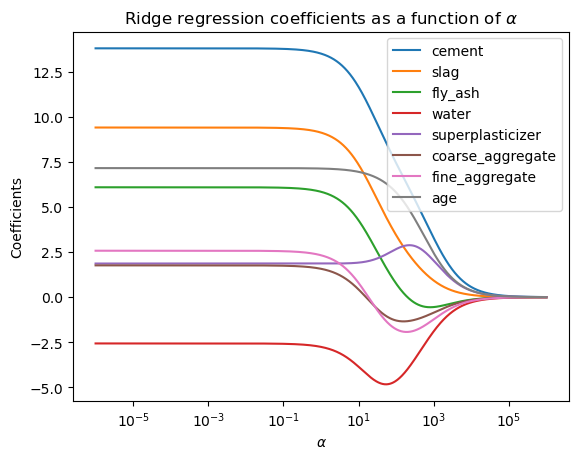

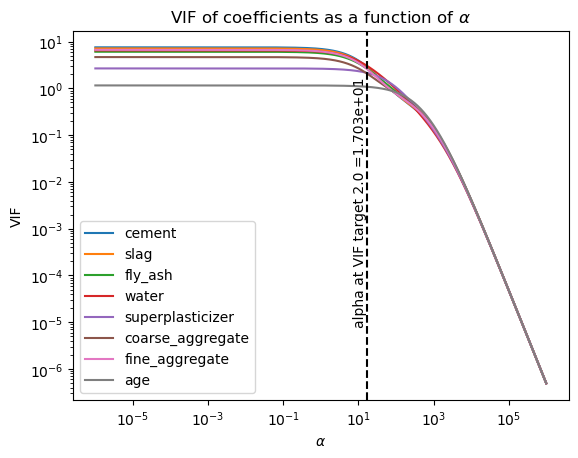

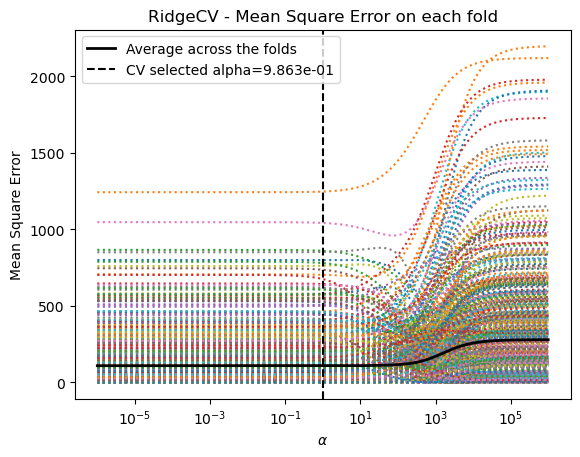

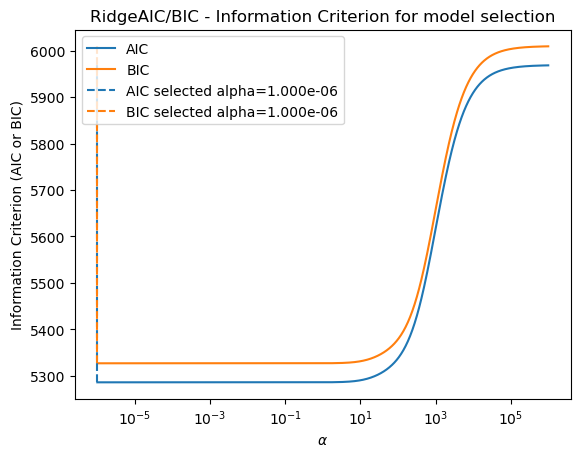

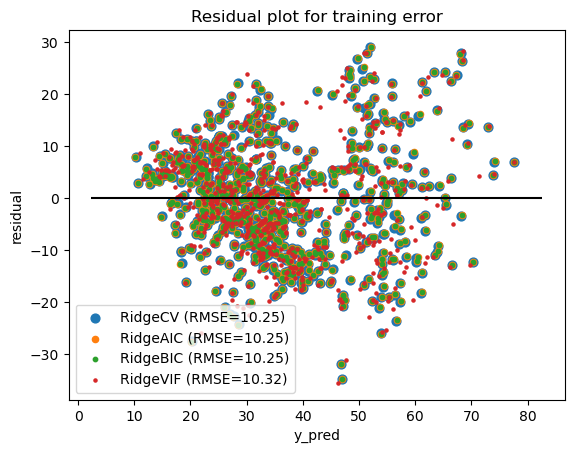

In [37]:
from stepAIC import ridge
model_objects, model_outputs = ridge(X_train, y_train, vif_target=2)

#### Note that the results of RidgeVIF have acceptable multicollinearity including all of the candidate features. The RidgeVIF results also have similar model skill compared with the other methods. All features had VIF<5 using the RidgeVIF algorithm.

#### The RidgeCV, RidgeAIC, and RidgeBIC results all had excessive multicollinearity with VIF>5 for several coefficients

# Variance Inflaction Factors in Ridge regression

The standard output from stepAIC ridge regression includes VIF. The VIF is calculated differently in ridge regression compared with stepwise and lasso regression. Below we will show how VIF is calculated in ridge regression.

The stepAIC package includes the following function called vif_ridge that calculates VIF for ridge regression:

In [38]:
def vif_ridge(X, pen_factors, is_corr=False):

    """
    Variance Inflation Factor for Ridge regression 

    adapted from statsmodels function vif_ridge by Josef Perktold https://gist.github.com/josef-pkt
    source: https://github.com/statsmodels/statsmodels/issues/1669
    source: https://stackoverflow.com/questions/23660120/variance-inflation-factor-in-ridge-regression-in-python
    author: https://stackoverflow.com/users/333700/josef
    Josef is statsmodels maintainer and developer, semi-retired from scipy.stats maintainance

    assumes penalization is on standardized feature variables
    assumes alpha is scaled by n_samples in calc of penalty factors if using sklearn Ridge (see note below)
    data should not include a constant

    Parameters
    ----------
    X : array_like with dimension n_samples x n_features
        correlation matrix if is_corr=True or standardized feature data if is_corr is False (default).
    pen_factors : iterable array of of regularization penalty factors with dimension n_alpha 
        If you are using sklearn Ridge for the analysis, then:
            pen_factor = alphas / n_samples
        If you are using statsmodels OLS .fit_regularized(L1_wt=0, then:
            pen_factor = alphas
        where alphas is the iterable array of alpha inputs to sklearn or statsmodels
        (see explanation in note below for difference between sklearn and statsmodels)
    is_corr : bool (default False)
        Boolean to indicate how corr_x is interpreted, see corr_x

    Returns
    -------
    vif : ndarray
        variance inflation factors for parameters in columns and 
        ridge penalization factors in rows

    could be optimized for repeated calculations

    Note about scaling of alpha in statsmodels vs sklearn 
    -------
    An analysis by Paul Zivich (https://sph.unc.edu/adv_profile/paul-zivich/) explains 
    how to get the same results of ridge regression from statsmodels and sklearn. 
    The difference is that sklearn's Ridge function scales the input of the 'alpha' 
    regularization term during excecution as alpha / n where n is the number of observations, 
    compared with statsmodels which does not apply this scaling of the regularization 
    parameter during execution. You can have the ridge implementations match 
    if you re-scale the sklearn input alpha = alpha / n for statsmodels. 
    Note that this rescaling of alpha only applies to ridge regression. 
    The sklearn and statsmodels results for Lasso regression using exactly 
    the same alpha values for input without rescaling.
    
    Here is a link to the original post of this analysis by Paul Zivich:
    
    https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression
    
    -------
    Example use of vif_ridge using sklearn for the analysis:
    
    from sklearn.datasets import load_diabetes
    from stepAIC import vif_ridge
    import numpy as np
    import pandas as pd
    X, y = load_diabetes(return_X_y=True, as_frame=True)
    n_samples = X.shape[0]
    alphas = np.array([0.01,0.1,1,10,100])
    pen_factors = alphas / n_samples 
    vifs = pd.DataFrame(vif_ridge(X, pen_factors))
    vifs.columns = X.columns
    vifs.index = alphas
    vifs = vifs.rename_axis("alpha")
    print(vifs)
    
    Output table of VIF vs alpha for each column of X:
                 age       sex       bmi        bp         s1         s2  \
    alpha                                                                  
    0.01    1.217226  1.277974  1.509267  1.459302  58.892664  38.997322   
    0.10    1.216506  1.277102  1.507746  1.458177  56.210859  37.300175   
    1.00    1.209504  1.268643  1.493706  1.447171  37.168552  25.227946   
    10.00   1.145913  1.192754  1.384258  1.347925   4.766889   4.250315   
    100.00  0.724450  0.724378  0.781325  0.767933   0.313543   0.465363   

                   s3        s4         s5        s6  
    alpha                                             
    0.01    15.338432  8.881508  10.032564  1.484506  
    0.10    14.786345  8.798110   9.656775  1.483458  
    1.00    10.827196  8.107172   6.979474  1.473147  
    10.00    3.300027  4.946247   2.222185  1.378038  
    100.00   0.615300  0.690887   0.758717  0.791855      
    """

    import numpy as np
    
    X = np.asarray(X)
    if not is_corr:
        # corr = np.corrcoef(X, rowvar=0, bias=True)    # bias is deprecated and has no effect
        corr = np.corrcoef(X, rowvar=0)
    else:
        corr = X

    eye = np.eye(corr.shape[1])
    res = []
    for k in pen_factors:
        minv = np.linalg.inv(corr + k * eye)
        vif = minv.dot(corr).dot(minv)
        res.append(np.diag(vif))

    return np.asarray(res)

For the training  data set used in this notebook, the vif_ridge function results in the following VIF over a range  of hypothetical alpha values (note that the VIF calculations in Ridge regression require standardardized X data):

In [39]:
n_samples = X_train_scaled.shape[0]
alphas = np.array([0.01,0.1,1,10,100])
pen_factors = alphas / n_samples 
vifs = pd.DataFrame(vif_ridge(X_train_scaled, pen_factors))
vifs.columns = X_train_scaled.columns
vifs.index = alphas
vifs = vifs.rename_axis("alpha")
print(vifs)

          cement      slag   fly_ash     water  superplasticizer  \
alpha                                                              
0.01    7.552394  7.167624  6.079079  6.483121          2.674663   
0.10    7.496895  7.115779  6.038938  6.443848          2.671085   
1.00    6.977151  6.630181  5.662609  6.075088          2.635992   
10.00   3.945162  3.793599  3.442859  3.866260          2.336718   
100.00  0.760681  0.772818  0.854487  0.975413          1.059693   

        coarse_aggregate  fine_aggregate       age  
alpha                                               
0.01            4.672493        6.670653  1.157949  
0.10            4.641993        6.622235  1.157511  
1.00            4.356192        6.168867  1.153172  
10.00           2.678235        3.528065  1.112854  
100.00          0.779132        0.771479  0.827614  


# Conclusion

The results of LassoCV, LassoLarsCV, and LassoLarsAIC are all very similar to the previous stepwise results using AIC as the criterion. Each of these models is problematic because they include too many features with excessive multi-collinearity. In other words, using Lasso regression does not necessarily guarantee that the model will be acceptable in terms of parsimonious trade-offs between skill and collinearity

The results from LassoLarsBIC are similar to the previous stepwise results using BIC as the criterion. Both of these methods select the same features as the optimum model. The optimum models using either stepwise regression with BIC or LassoLarsIC with BIC are both acceptable alternatives with similar model skill and acceptable magnitude of collinearity of predictor variables.

The results of RidgeVIF produced a model with acceptable multicollinearity (VIF<5 for all features) and with similar skill compared with LassoLarsBIC and stepwise with BIC as the criterion. Either of these methods produce acceptable models.

